['/home/refulgent/Cyverse/sparkle/sparkle_ncars_2_d_bicycle_c_rl_f_0.2_u_20.0_O_False_L_False_G_True_C_True_max_update_rate_20.0_time_step_0.01_recordtime_60.0_dynamics_bicycle_2021-12-14-23-32-58.bag', '/home/refulgent/Cyverse/sparkle/sparkle_ncars_2_d_bicycle_c_rl_f_1.0_u_20.0_O_False_L_False_G_True_C_True_max_update_rate_100.0_time_step_0.01_recordtime_60.0_dynamics_bicycle_2021-12-14-23-41-04.bag']
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_ncars_2_d_bicycle_c_rl_f_0.2_u_20.0_O_False_L_False_G_True_C_True_max_update_rate_20.0_time_step_0.01_recordtime_60.0_dynamics_bicycle_2021-12-14-23-32-58 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_ncars_2_d_bicycle_c_rl_f_1.0_u_20.0_O_False_L_False_G_True_C_True_max_update_rate_100.0_time_step_0.01_recordtime_60.0_dynamics_bicycle_2021-12-14-23-41-04 already exists. Not creating.


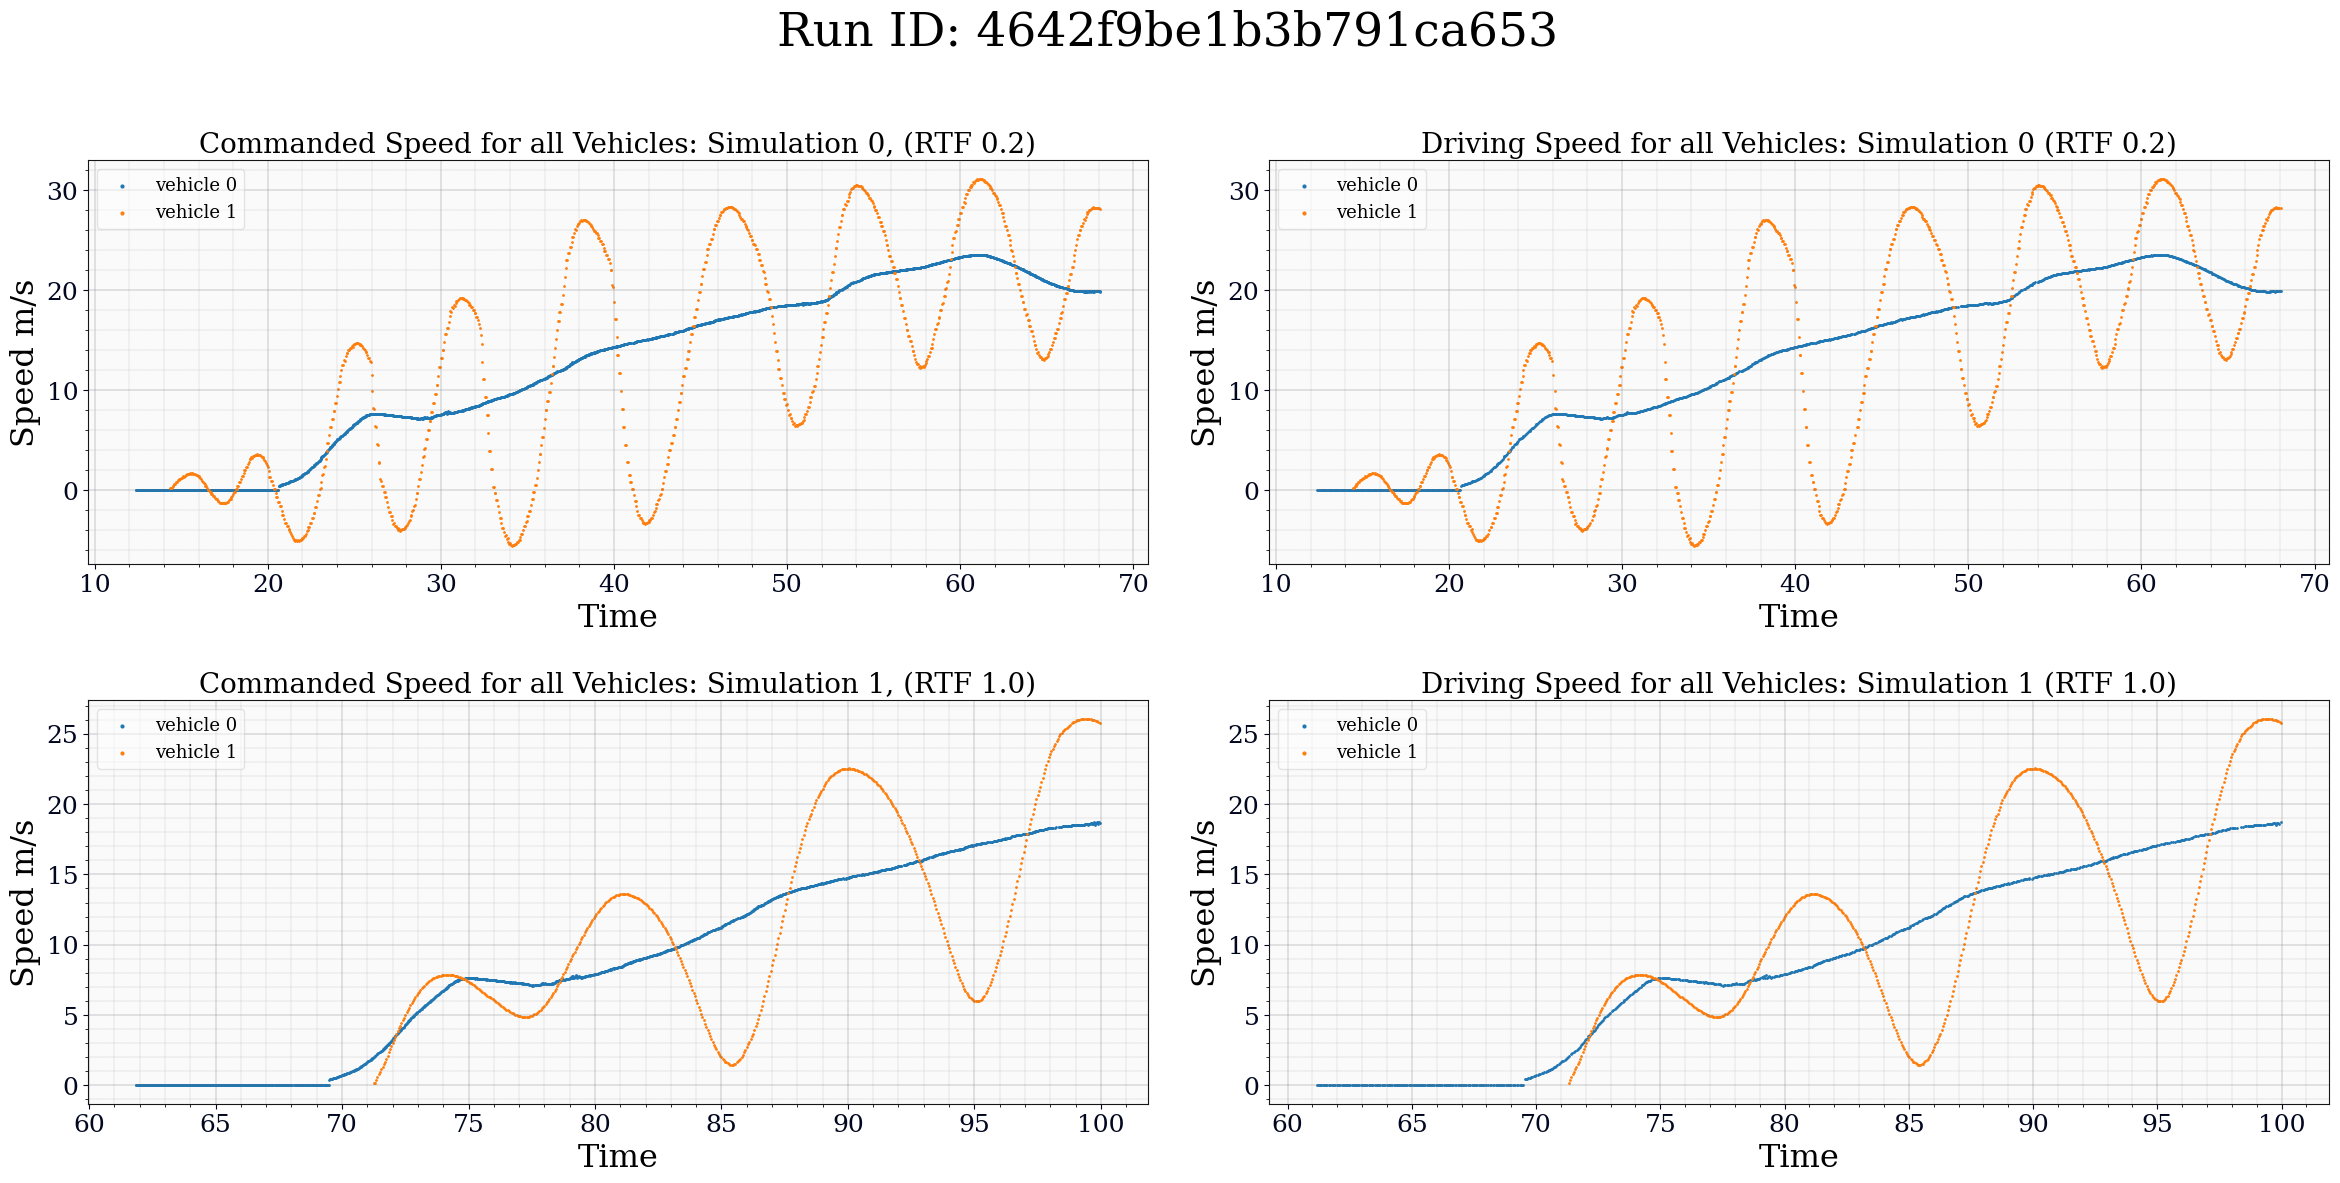

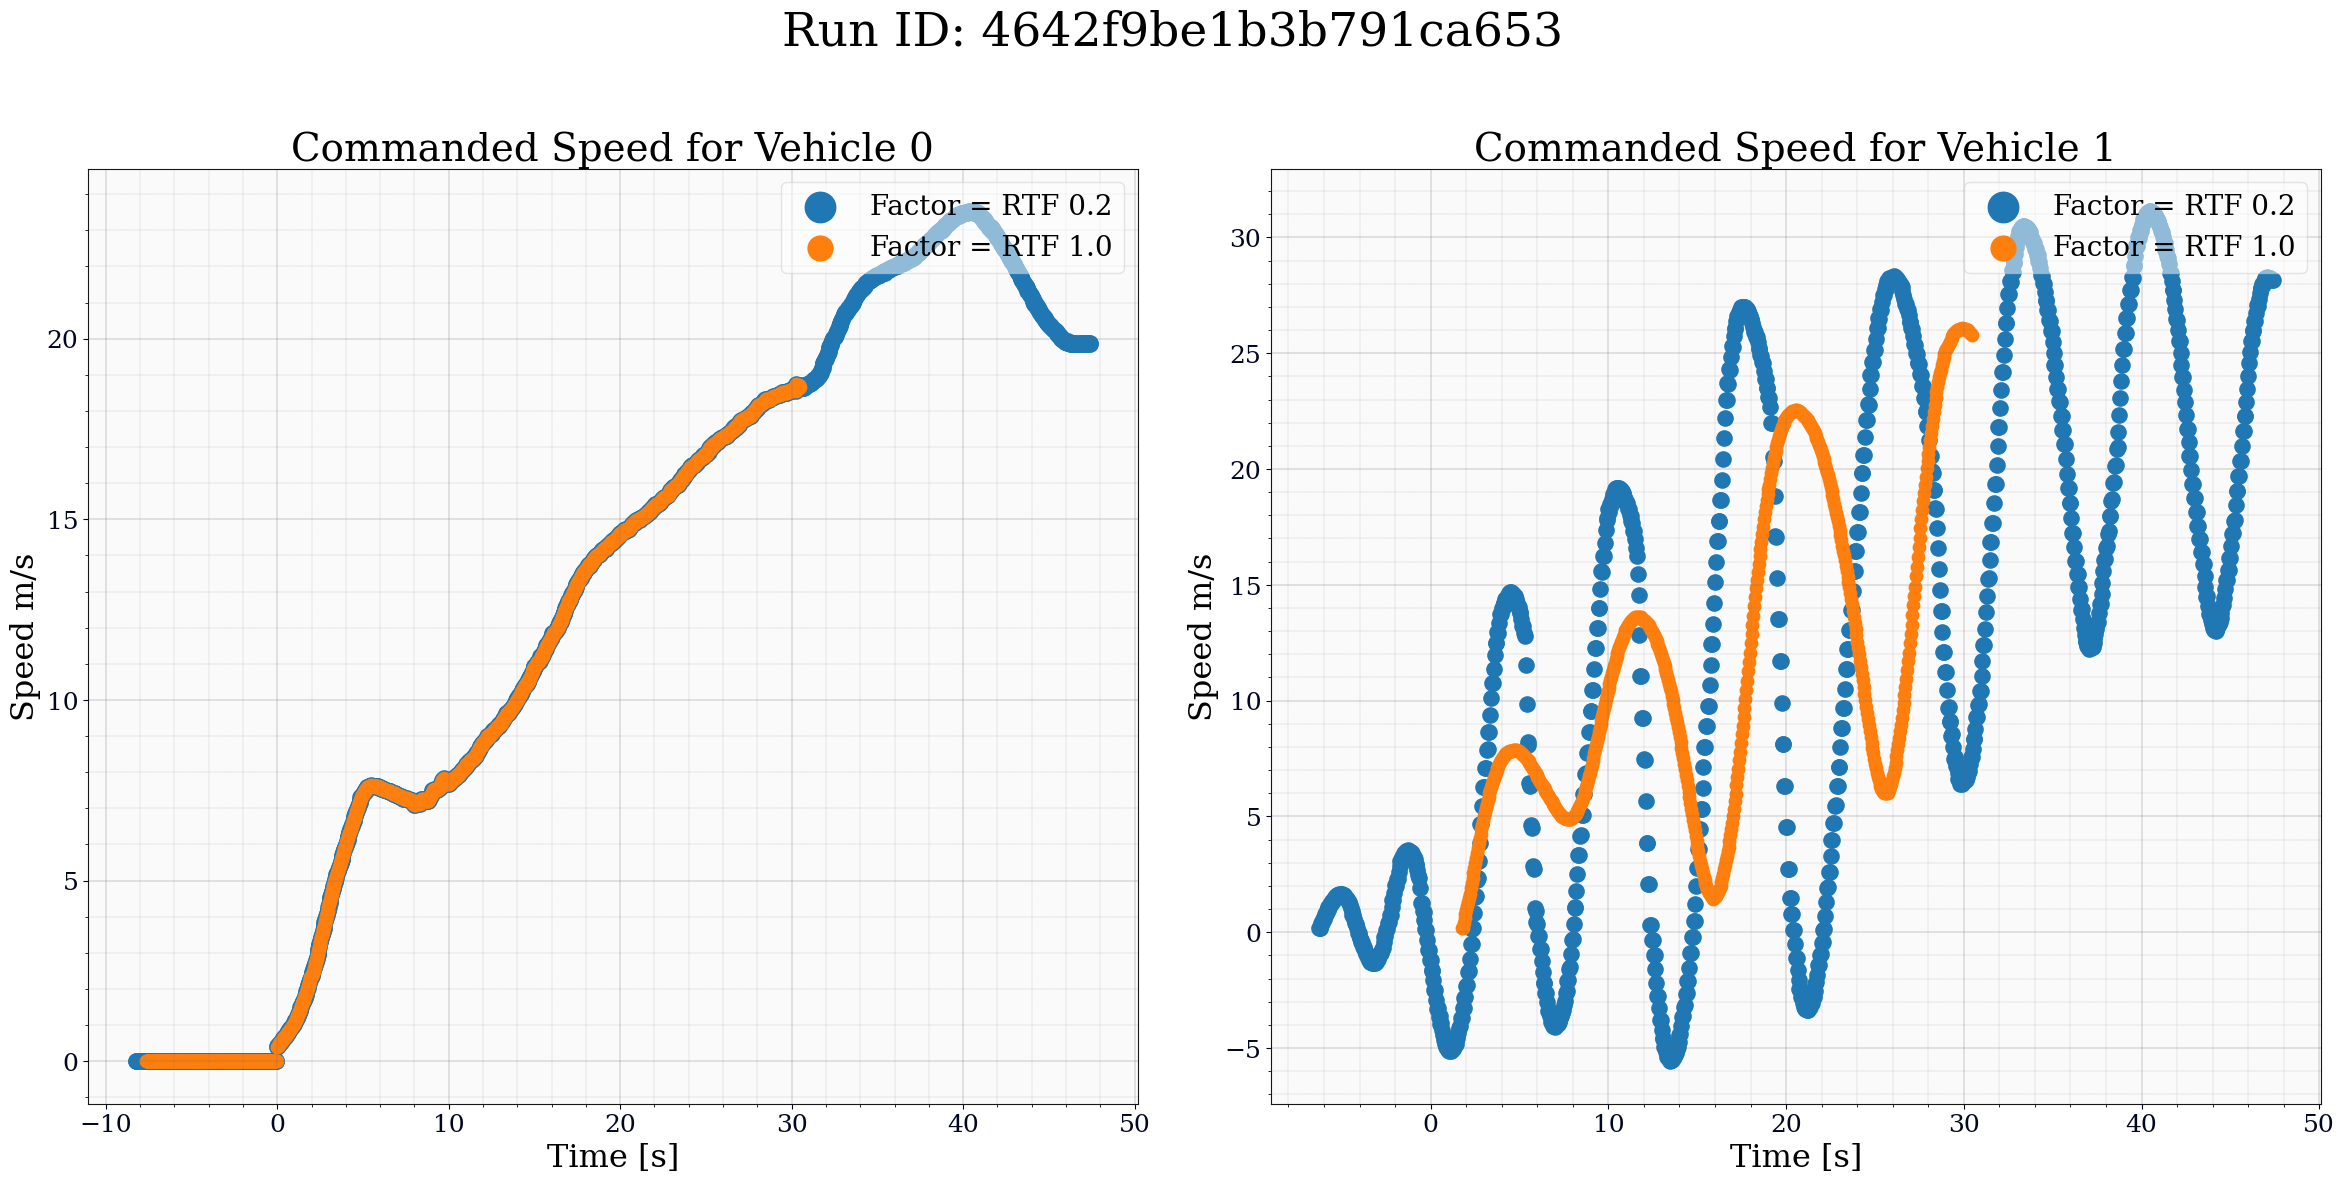

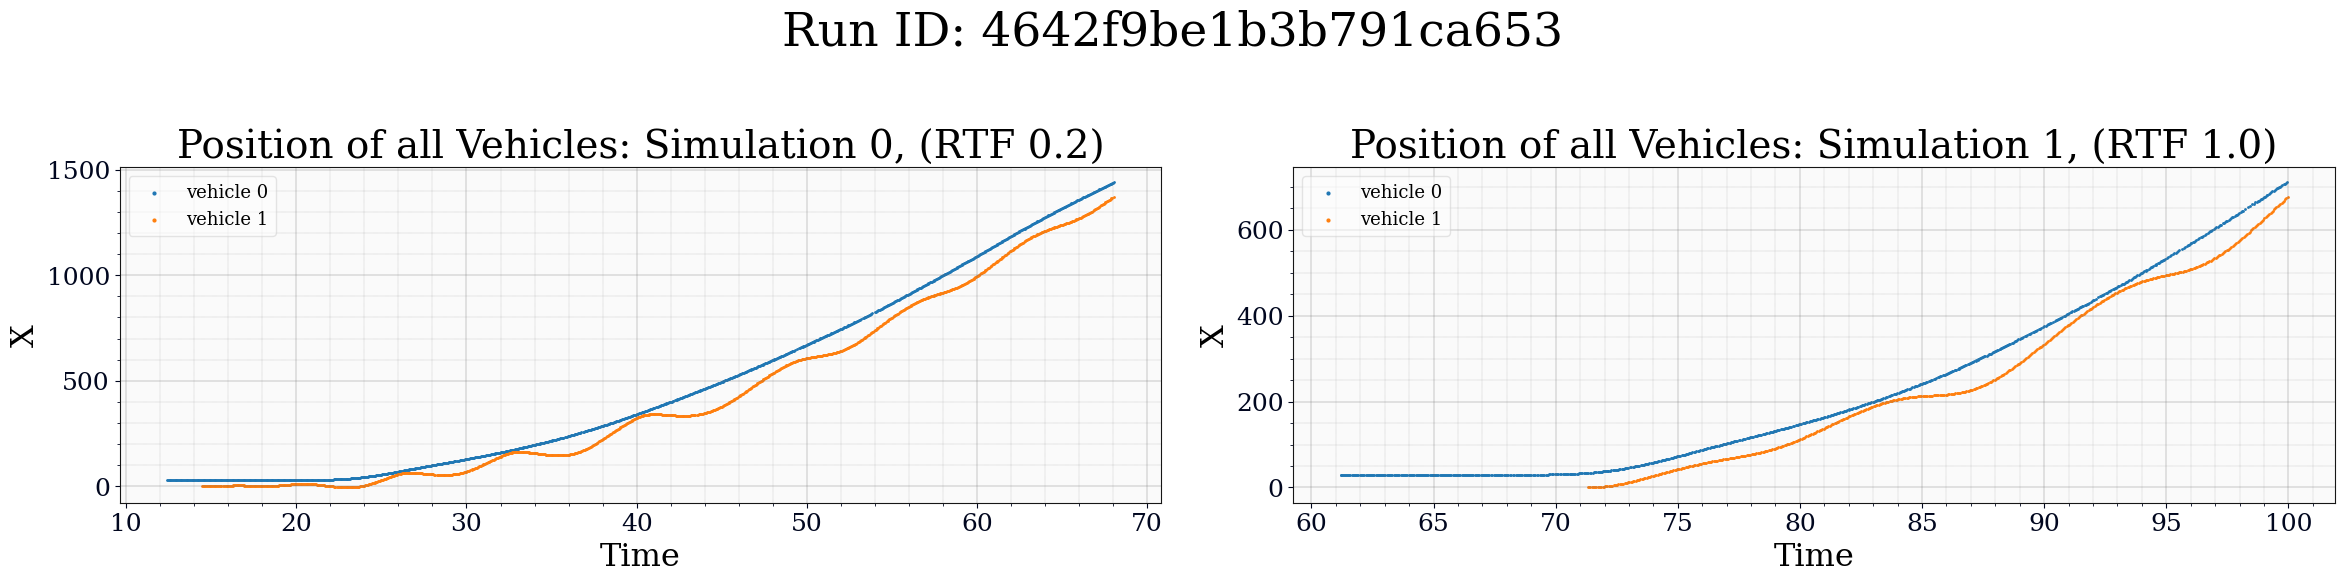

[2021_12_14_23_48_18] (root) INFO: Zero pass correlation coefficient  = (0.9999871256714681, 0.0)
[2021_12_14_23_48_19] (root) INFO: Zero pass correlation coefficient  = (0.683268577699479, 1.9722619157859582e-60)
[2021_12_14_23_48_22] (root) INFO: Correlation Coefficient of Aligned Data is 0.9482713797771188
[2021_12_14_23_48_23] (root) INFO: Zero pass correlation coefficient  = (1.0, 0.0)
[2021_12_14_23_48_23] (root) INFO: Zero pass correlation coefficient  = (1.0, 0.0)


/home/refulgent/VersionControl/sparkle_python/notebooks/sparkle_analysis.py:239: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/VersionControl/sparkle_python/notebooks/sparkle_analysis.py:280: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



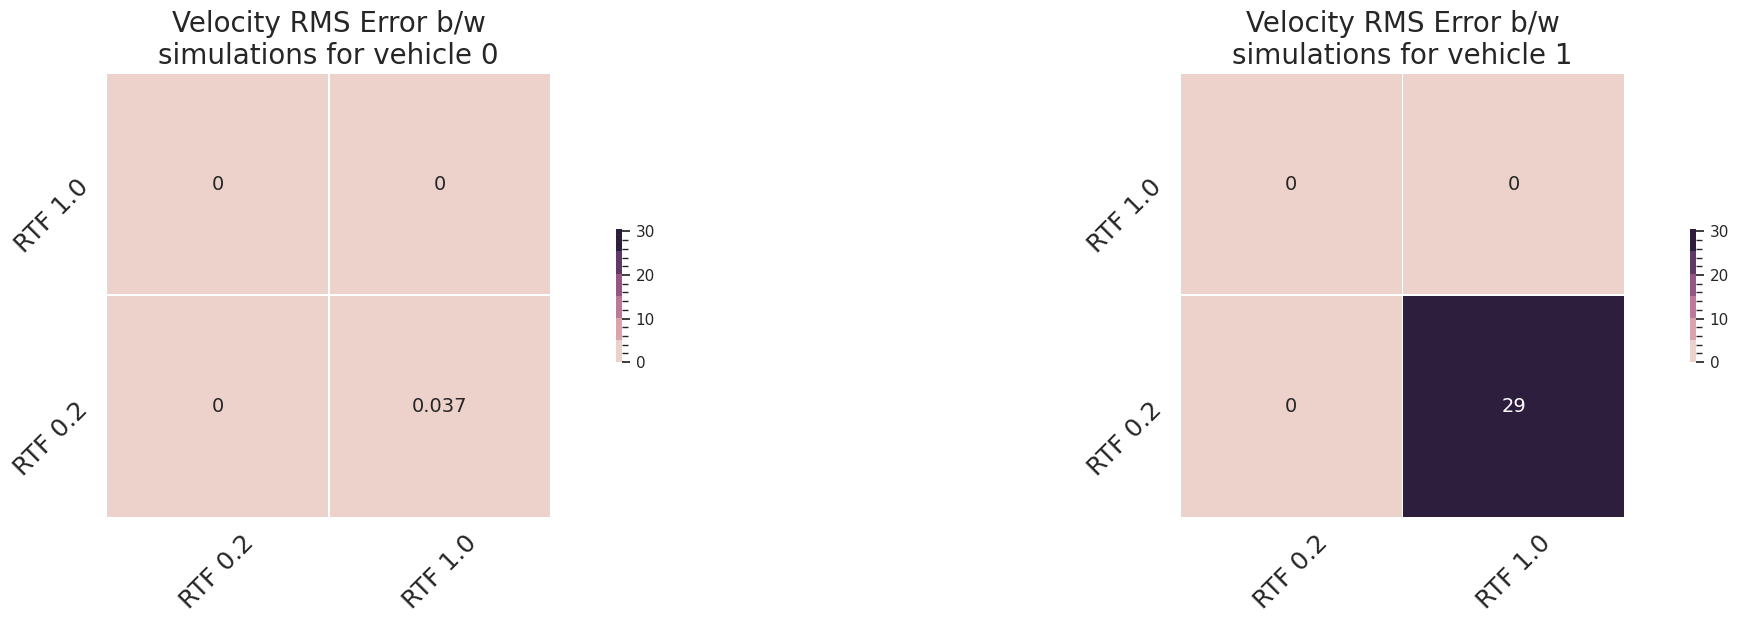

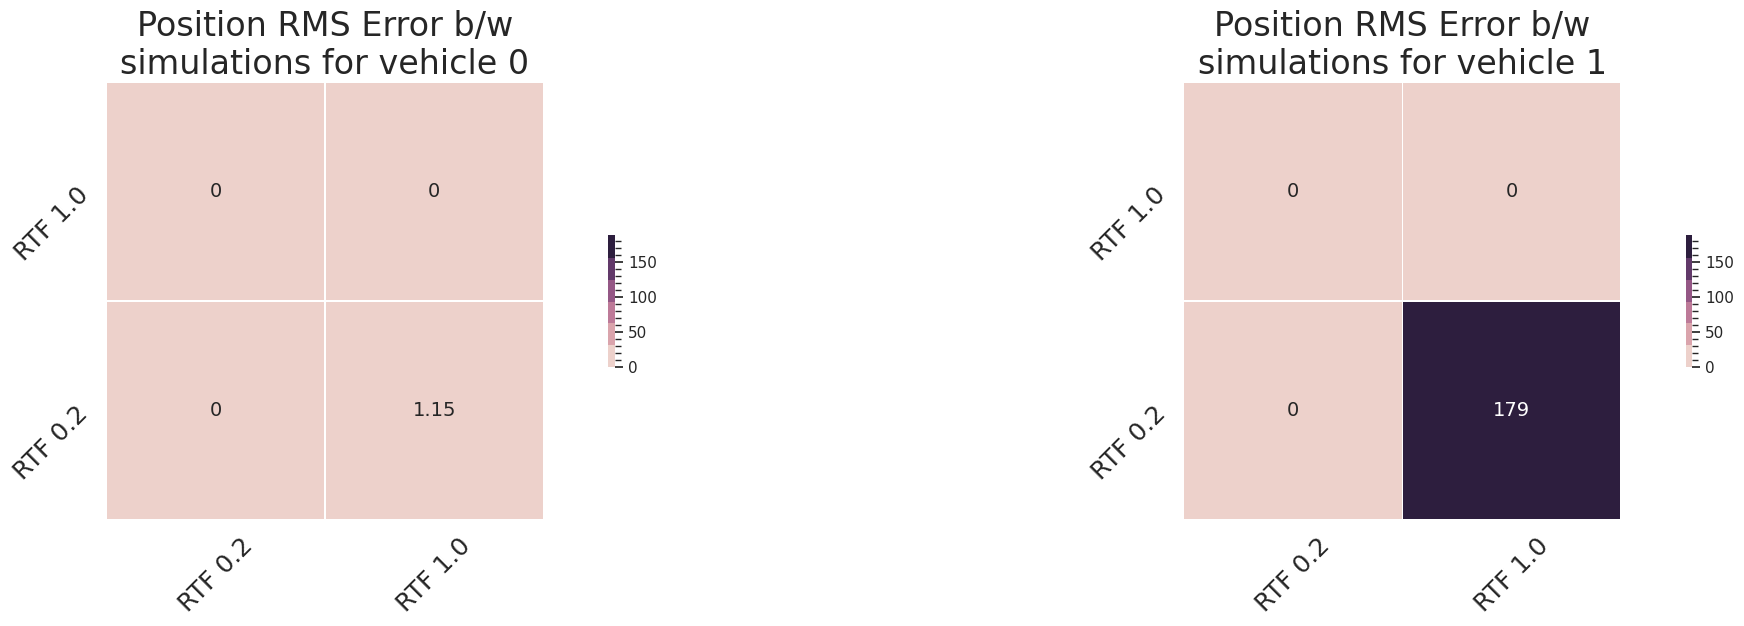

In [3]:
#!/usr/bin/env python
# Author: Rahul Bhadani

from matplotlib.pyplot import imshow
import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread
import datetime
import time
from sparkle import layout
import sys, getopt
import ntpath
import seaborn as sns
argv = sys.argv[1:]
run_id = "run_id"

# try:
#     opts, args = getopt.getopt(argv,"hr:",["run_id="])
#     if len(opts) == 0:
#         print('Check options by typing:\n{} -h'.format(__file__))
#         sys.exit()
# except getopt.GetoptError:
#     print('Check options by typing:\n{} -h'.format(__file__))
#     sys.exit(2)

# print("OPTS: {}".format(opts))
# for opt, arg in opts:
#     if(opt == '-h'):
#         print('\n{} [OPTIONS]'.format(__file__))
#         print('\t -h, --help\t\t Get help')
#         print('\t -r, --run_id\t Run ID to distinguish specific ')
#         sys.exit()
#     elif(opt in ("-r", "--run_id")):
#         run_id  = arg


# run_id = "6b75bfb6bf43b294cae1"
# run_id = "12268da8a56f3c1de068"
#run_id = "6746d039d5c0174d4687"
run_id = "0b4dd8ad903c9d03e0b7"
run_id = "08b6a72b42bbda416e8d"
run_id = "d125f74cb495c2bb5ca7"
run_id = "3cb8a01654c5599b48a5"
run_id = "57d290c0a31167357976"
run_id = "fee25aca5ca6ba94e0c4"
run_id = "8ec760d7e69c71186467"
run_id = "518804d6cccd33ce132f"
run_id = "4642f9be1b3b791ca653"
# Analysis
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []
bagfiles = []

logdir = '/home/refulgent/Cyverse/sparkle/'

real_time_factor = []
controller = []
gui_enabled = []
dynamics = []
N_cars = []
use_odom = []
use_lead_vel = []
update_rate = []

Lines = None
with open(logdir+run_id + '.txt', 'r') as f:
    Lines = f.readlines()
    
for Line in Lines:
    Line = Line.strip()
    bagfiles.append(Line)

    splits = Line.split('_')
    N_cars.append(int(splits[splits.index('ncars') + 1]))
    dynamics.append(splits[splits.index('d') + 1])
    controller.append(splits[splits.index('c') + 1])
    real_time_factor.append('RTF ' + splits[splits.index('f') + 1])
    gui_enabled.append(splits[splits.index('G') + 1])
    use_odom.append(splits[splits.index('O') + 1])
    use_lead_vel.append(splits[splits.index('L') + 1])
    update_rate.append(splits[splits.index('u') + 1])

Blist = []
print(bagfiles)
for index, bf in enumerate(bagfiles):
    B = bagreader(bf)
    Blist.append(B)
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, N_cars[index]):
            # print(i)
            cmdvel_file = B.message_by_topic('/sparkle_{:03d}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/sparkle_{:03d}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/sparkle_{:03d}/setvel'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)


# per simuation plot
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 2 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}, ({})'.format(j, real_time_factor[j]), fontsize = 20)

    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {} ({})'.format(j, real_time_factor[j]), fontsize = 20)

        
plt.suptitle("Run ID: {}".format(run_id), y = 1.001)
plt.tight_layout()
plt.savefig(logdir + run_id + '_speed_all_plot.png', bbox_inches='tight')
plt.savefig(logdir + run_id + '_speed_all_plot.pdf', bbox_inches='tight')
plt.show()


max_car = np.max(N_cars)
figheight = fig.get_figheight()/len(cmd_speed)
fig, ax = bagpy.create_fig(nrows = int(np.ceil(max_car/2)), ncols = 2 )
fig.set_figheight( fig.get_figheight()*2)
ax = ax.ravel()
for j in range(0, len(cmd_speed[0])):
    
    s_i = 120
    for k in range(0, len(cmd_speed)):
        time = cmd_speed[k][j]['Time'].tolist()
        t0 = cmd_speed[k][0][cmd_speed[k][0]['linear.x'] > 0].iloc[0]['Time']
        ax[j].scatter(x= cmd_speed[k][j]['Time'] - t0, y = cmd_speed[k][j]['linear.x']  ,  s = s_i, label = 'Factor = {}'.format(real_time_factor[k]))

        s_i = s_i - 40
        if(s_i <10):
            s_i = 10
    ax[j].legend(loc='upper right', fontsize = 20)
    ax[j].set_xlabel('Time [s]')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for Vehicle {}'.format(j))

plt.suptitle("Run ID: {}".format(run_id), y = 1.001)
plt.tight_layout()
plt.savefig(logdir + run_id + '_speed_overlaid_zero_trimmed.png', bbox_inches='tight')
plt.savefig(logdir + run_id + '_speed_overlaid_zero_trimmed.pdf', bbox_inches='tight')
plt.show()

# per simuation plot
fig, ax = bagpy.create_fig(nrows = int(np.ceil(len(cmd_speed)/2)), ncols = 2 )
ax = ax.ravel()
for j in range(0, len(cmd_speed)):
    
    cs = posX[j]

    
    for i, v in enumerate(cs):
        ax[j].scatter(x = 'Time', y = 'pose.pose.position.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j].legend()
        ax[j].set_xlabel('Time')
        ax[j].set_ylabel('X')
        ax[j].set_title('Position of all Vehicles: Simulation {}, ({})'.format(j, real_time_factor[j]))
        
plt.suptitle("Run ID: {}".format(run_id), y = 1.0001)
plt.tight_layout()
plt.savefig(logdir + run_id + '_pos_persim_plot.png', bbox_inches='tight')
plt.savefig(logdir + run_id + '_pos_persim_plot.pdf', bbox_inches='tight')
plt.show()

## Calculate the difference of output velocity profile:
RMS_BigV = []
for vehicle  in range(0,len(speed[0])):
    rms_matrix = np.zeros((len(speed), len(speed)))
    for ii in range(0, len(speed)):
        for jj in range(0, len(speed)):
            if (ii >= jj):
                continue
            df1 = pd.DataFrame()
            df2 = pd.DataFrame()
            df1['Time'] = speed[ii][vehicle]['Time'].iloc[:-25] - speed[ii][vehicle]['Time'].iloc[0]
            df1['Message'] = speed[ii][vehicle]['linear.x'].iloc[:-25] # remove last 25 points when sim starts breaking down
            df2['Time'] = speed[jj][vehicle]['Time'].iloc[:-25] - speed[jj][vehicle]['Time'].iloc[0]
            df2['Message'] = speed[jj][vehicle]['linear.x'].iloc[:-25] # remove last 25 points when sim starts breaking down
            df1new, df2new = strymread.ts_sync(df1, df2, rate ='first', method = 'nearest')        
            shift = strymread.time_shift(df1new,df2new,correlation_threshold=0.9)
            df2new['Time'] = df2new['Time']+shift
            RMSf = (df1new['Message'] - df2new['Message'])**2  + (df1new['Time'] - df2new['Time'])**2  
            RMS = np.sqrt( np.mean(RMSf.values))
            rms_matrix[ii][jj] = RMS

    RMS_BigV.append(rms_matrix)
    
sns.set()
fig2, ax2 = plt.subplots(int(np.ceil(max_car/2)), 2)
ax2 = ax2.ravel()
for vehicle  in range(0,len(speed[0])):
    cmap= sns.cubehelix_palette()
    g = sns.heatmap(RMS_BigV[vehicle], annot=True, ax = ax2[vehicle], linewidths=.5, xticklabels = real_time_factor, yticklabels=real_time_factor, square=True,  annot_kws={"size": 14}, cbar_kws={"shrink": .30}, cmap=cmap, vmax=np.max(RMS_BigV)*1.05, vmin = 0.0, fmt='.2g')
    g.invert_yaxis()
    ax2[vehicle].set_title('Velocity RMS Error b/w\nsimulations for vehicle {}'.format(vehicle), fontsize = 20)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18, rotation = 45)
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18, rotation = 45)

fig2.savefig(logdir + run_id + '_velocity_rms_veh_plot.png', bbox_inches='tight')
fig2.savefig(logdir + run_id + '_velocity_rms_veh_plot.pdf', bbox_inches='tight')
fig2.tight_layout()
fig2.show()


RMS_Big = []
## Calculate the difference of positions:
for vehicle  in range(0,len(posX[0])):
    rms_matrix = np.zeros((len(posX), len(posX)))
    for ii in range(0, len(posX)):
        for jj in range(0, len(posX)):
            if (ii >= jj):
                continue
            df1 = pd.DataFrame()
            df2 = pd.DataFrame()
            df1['Time'] = posX[ii][vehicle]['Time'] - posX[ii][vehicle]['Time'].iloc[0]
            df1['Message'] = posX[ii][vehicle]['pose.pose.position.x'] # remove last 25 points when sim starts breaking down
            df2['Time'] = posX[jj][vehicle]['Time'] - posX[jj][vehicle]['Time'].iloc[0]
            df2['Message'] = posX[jj][vehicle]['pose.pose.position.x'] # remove last 25 points when sim starts breaking down
            df1new, df2new = strymread.ts_sync(df1, df2, rate ='first', method = 'linear')
            shift = strymread.time_shift(df1new,df1new,correlation_threshold=0.9)
            df2new['Time'] = df2new['Time']+shift
            RMSf = (df1new['Message'] - df2new['Message'])**2  + (df1new['Time'] - df2new['Time'])**2  
            RMS = np.sqrt( np.mean(RMSf.values))
            rms_matrix[ii][jj] = RMS

    RMS_Big.append(rms_matrix)
            

sns.set()
fig2, ax2 = plt.subplots(int(np.ceil(max_car/2)), 2)
ax2 = ax2.ravel()
for vehicle in range(0,len(posX[0])):
    cmap= sns.cubehelix_palette()
    g = sns.heatmap(RMS_Big[vehicle], annot=True, ax = ax2[vehicle], linewidths=.5, xticklabels = real_time_factor, yticklabels=real_time_factor,  square=True,  annot_kws={"size": 14}, cbar_kws={"shrink": .30}, cmap=cmap, vmax=np.max(RMS_Big)*1.05, vmin = 0.0, fmt='.3g')
    g.invert_yaxis()
    ax2[vehicle].set_title('Position RMS Error b/w\nsimulations for vehicle {}'.format(vehicle), fontsize = 24)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18, rotation = 45)
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18, rotation = 45)
    
fig2.savefig(logdir + run_id + '_pos_rms_veh_plot.png', bbox_inches='tight')
fig2.savefig(logdir + run_id + '_pos_rms_veh_plot.pdf', bbox_inches='tight')
fig2.tight_layout()
fig2.show()